In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [82]:
df = pd.read_csv(r'trans_us.csv',
                 index_col = 0, thousands  = ',')

In [83]:
df.columns.names = ['months']
df.index.names=['stations']
df.head(3)

months,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
stations,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56


In [84]:
# = df.fillna(15)

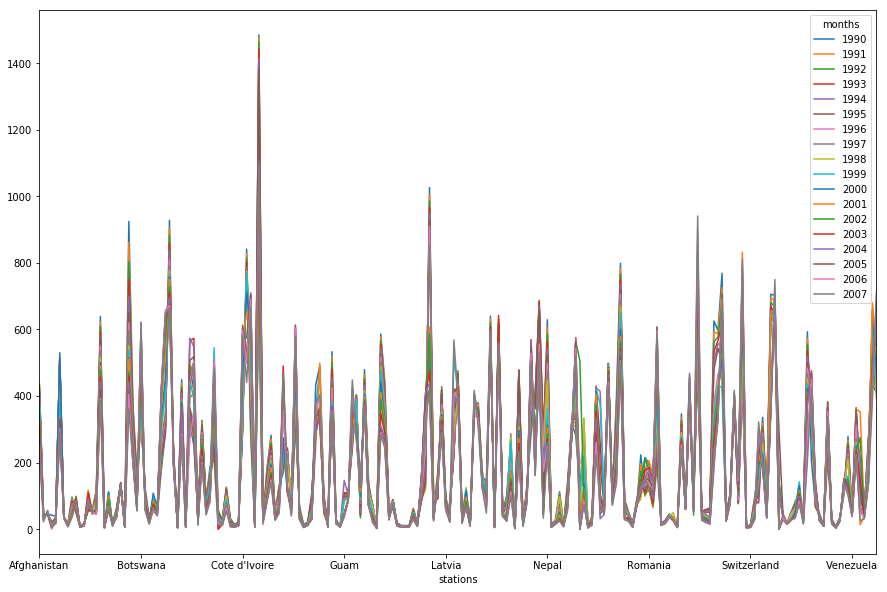

In [85]:
df.plot(figsize=(15,10))
plt.show()

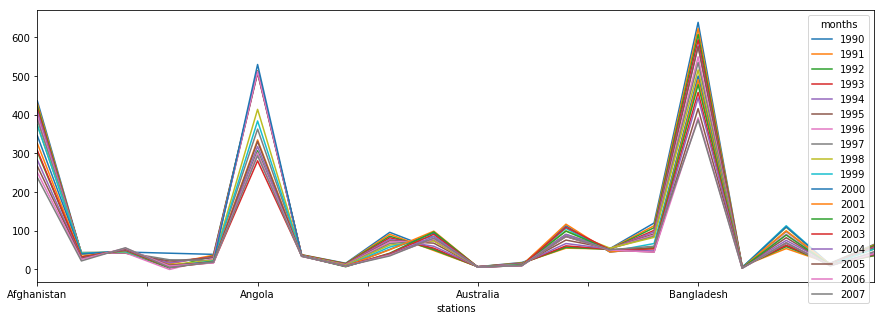

In [86]:
df.iloc[:20].plot(figsize=(15,5))
plt.show()

In [87]:
cc=df.corr()

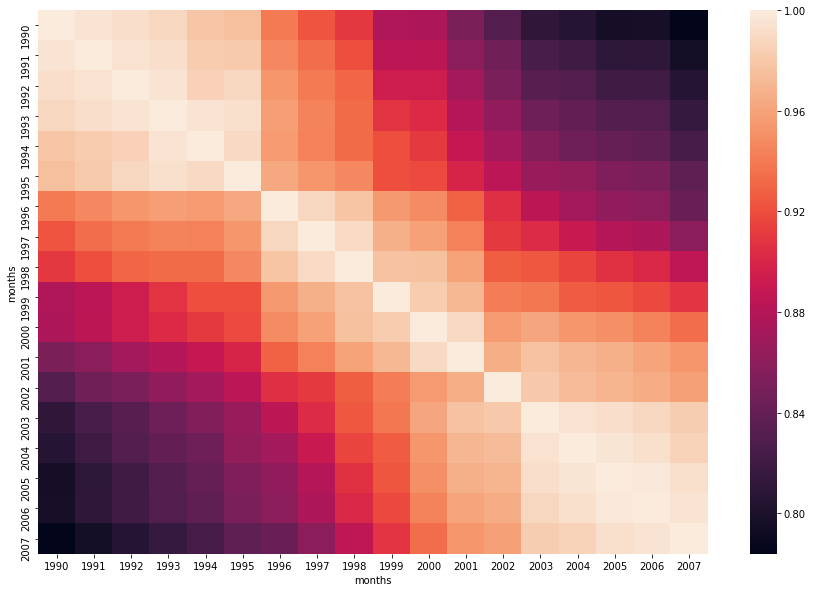

In [88]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cc,ax=ax)
plt.show()

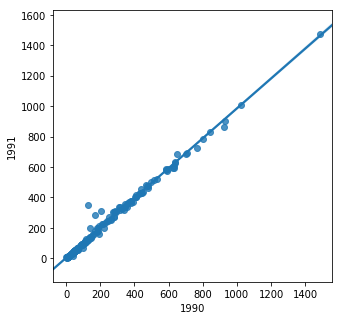

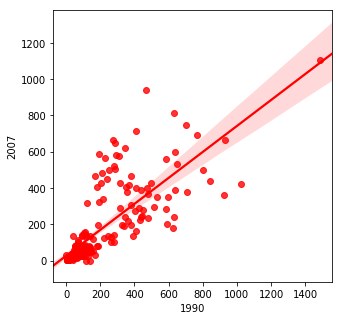

In [103]:
plt.subplots(figsize=(5,5))
sns.regplot(data=df,x='1990',y='1991')
plt.subplots(figsize=(5,5))
sns.regplot(data=df,x='1990',y='2007',color='r')
plt.show()

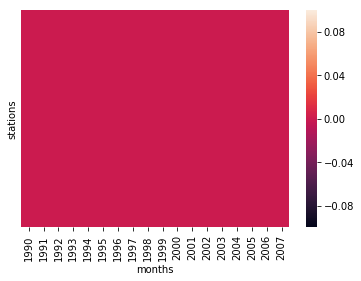

In [109]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [115]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
e2d = pca.transform(df)

In [120]:
df2=pd.DataFrame(e2d)
df2.index =df.index
df2.columns = ['PC1','PC2']
df2.head()

,PC1,PC2
stations,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


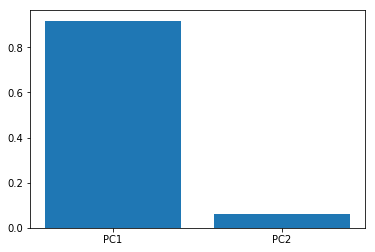

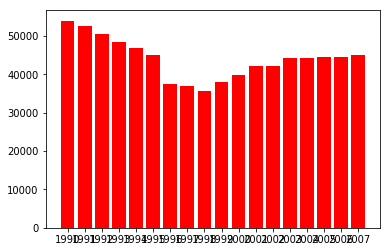

In [141]:
plt.bar(df2.columns,pca.explained_variance_ratio_)
plt.show()
plt.bar(df.columns,df.var(),color='r')
plt.show()